In [1]:
using Revise

In [2]:
import LinearAlgebra as LA
import SparseArrays as SA
import Plots
using LaTeXStrings
import QuantumOptics as QO

using FFTW:ifft, fft, fftshift, fftfreq

In [86]:
repo_path = "/local/lmseifert/Other/shaken_lattice_qoc/"
src_path = repo_path * "src/"
include(src_path * "system.jl")
include(src_path * "primitives.jl")
include(src_path * "primitives_utils.jl")

gate_to_basis (generic function with 1 method)

In [4]:
V = 10. #10.
p_max = 5
system = ShakenLatticeSystem1D(V, p_max; bloch_basis=false)
mid = system.params[:mid]
dim = system.params[:dim]

11

In [5]:
system.params[:bloch_energies]

11-element Vector{Float64}:
  -2.1530783420409128
   3.492474366750998
   5.613041084883586
  16.194837348739163
  16.227316189180794
  36.08943757988043
  36.089470356042895
  64.05000409042903
  64.05000409773272
 100.17324661420041
 100.17324661420096

In [6]:
nb, Bb, TnB = coarse_setup(system)

(nBasis{Int64}([11], 5, 11), BlochBasis{Int64}([11], 5, 11), Operator(dim=11x11)
  basis left:  nBasis{Int64}([11], 5, 11)
  basis right: BlochBasis{Int64}([11], 5, 11)
     3.1e-6-0.0im   -1.16278e-5-0.0im  …      0.61515+0.0im
 0.00012667-0.0im  -0.000448867-0.0im      -0.0426291-0.0im
 0.00334874-0.0im    -0.0108523-0.0im      0.00166263+0.0im
  0.0509792-0.0im     -0.140664-0.0im     -4.94193e-5-0.0im
   0.366823-0.0im     -0.692889-0.0im      1.28654e-6+0.0im
   0.851858+0.0im      1.72e-15-0.0im  …  -7.30874e-8-0.0im
   0.366823-0.0im      0.692889+0.0im      1.64202e-6+0.0im
  0.0509792-0.0im      0.140664-0.0im     -6.30942e-5-0.0im
 0.00334874-0.0im     0.0108523-0.0im      0.00212269+0.0im
 0.00012667-0.0im   0.000448867-0.0im       -0.054425-0.0im
     3.1e-6-0.0im    1.16278e-5-0.0im  …     0.785369+0.0im)

In [94]:
pb = MomentumBasis(nb, 50)

Momentum(pmin=-11, pmax=11, N=550)

In [145]:
g = Z(Bb, 2)

Operator(dim=11x11)
  basis: BlochBasis{Int64}([11], 5, 11)
 1.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  1.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  1.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     1.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  1.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  1.0+0.0im

In [146]:
gate_to_basis(g, nBasis(5); TnB=TnB)

Operator(dim=11x11)
  basis: nBasis{Int64}([11], 5, 11)
          1.0+0.0im   -1.24576e-6+0.0im  …   -3.71768e-8-0.0im
  -1.24576e-6+0.0im      0.999958+0.0im      -1.24576e-6-0.0im
  -2.37681e-5+0.0im  -0.000796448+0.0im      -2.37681e-5-0.0im
 -0.000186738+0.0im   -0.00625742+0.0im     -0.000186738-0.0im
   4.07476e-5+0.0im    0.00136541+0.0im       4.07476e-5+0.0im
  -1.25552e-5+0.0im  -0.000420714+0.0im  …   -1.25552e-5-0.0im
   4.07476e-5+0.0im    0.00136541+0.0im       4.07476e-5+0.0im
 -0.000186738+0.0im   -0.00625742+0.0im     -0.000186738-0.0im
  -2.37681e-5-0.0im  -0.000796448-0.0im      -2.37681e-5-0.0im
  -1.24576e-6-0.0im   -4.17442e-5-0.0im      -1.24576e-6-0.0im
  -3.71768e-8-0.0im   -1.24576e-6-0.0im  …           1.0+0.0im

In [147]:
gate_to_basis(g, MomentumBasis(nb, 50); TnB=TnB)

Operator(dim=550x550)
  basis: Momentum(pmin=-11, pmax=11, N=550)
 1.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0-0.0im  0.0-0.0im  0.0-0.0im
 0.0+0.0im  1.0+0.0im  0.0+0.0im     0.0-0.0im  0.0-0.0im  0.0-0.0im
 0.0+0.0im  0.0+0.0im  1.0+0.0im     0.0-0.0im  0.0-0.0im  0.0-0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0-0.0im  0.0-0.0im  0.0-0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0-0.0im  0.0-0.0im  0.0-0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0-0.0im  0.0-0.0im  0.0-0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0-0.0im  0.0-0.0im  0.0-0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0-0.0im  0.0-0.0im  0.0-0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0-0.0im  0.0-0.0im  0.0-0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0-0.0im  0.0-0.0im  0.0-0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0-0.0im  0.0-0.0im  0.0-0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0-0.0im  0.0-0.0im  0.0-0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0-0.0im  0.0-0.0im  0.0-0.0im
    ⋮                             ⋱  

In [148]:
pb = MomentumBasis(nb, 50)

Momentum(pmin=-11, pmax=11, N=550)

In [149]:
g2 = gate_to_basis(g, nBasis(g.basis_l); TnB=TnB)

Operator(dim=11x11)
  basis: nBasis{Int64}([11], 5, 11)
          1.0+0.0im   -1.24576e-6+0.0im  …   -3.71768e-8-0.0im
  -1.24576e-6+0.0im      0.999958+0.0im      -1.24576e-6-0.0im
  -2.37681e-5+0.0im  -0.000796448+0.0im      -2.37681e-5-0.0im
 -0.000186738+0.0im   -0.00625742+0.0im     -0.000186738-0.0im
   4.07476e-5+0.0im    0.00136541+0.0im       4.07476e-5+0.0im
  -1.25552e-5+0.0im  -0.000420714+0.0im  …   -1.25552e-5-0.0im
   4.07476e-5+0.0im    0.00136541+0.0im       4.07476e-5+0.0im
 -0.000186738+0.0im   -0.00625742+0.0im     -0.000186738-0.0im
  -2.37681e-5-0.0im  -0.000796448-0.0im      -2.37681e-5-0.0im
  -1.24576e-6-0.0im   -4.17442e-5-0.0im      -1.24576e-6-0.0im
  -3.71768e-8-0.0im   -1.24576e-6-0.0im  …           1.0+0.0im

In [150]:
gate_to_same_basis_type(g2, nBasis(pb))

Operator(dim=11x11)
  basis: nBasis{Int64}([11], 5, 11)
          1.0+0.0im   -1.24576e-6+0.0im  …   -3.71768e-8-0.0im
  -1.24576e-6+0.0im      0.999958+0.0im      -1.24576e-6-0.0im
  -2.37681e-5+0.0im  -0.000796448+0.0im      -2.37681e-5-0.0im
 -0.000186738+0.0im   -0.00625742+0.0im     -0.000186738-0.0im
   4.07476e-5+0.0im    0.00136541+0.0im       4.07476e-5+0.0im
  -1.25552e-5+0.0im  -0.000420714+0.0im  …   -1.25552e-5-0.0im
   4.07476e-5+0.0im    0.00136541+0.0im       4.07476e-5+0.0im
 -0.000186738+0.0im   -0.00625742+0.0im     -0.000186738-0.0im
  -2.37681e-5-0.0im  -0.000796448-0.0im      -2.37681e-5-0.0im
  -1.24576e-6-0.0im   -4.17442e-5-0.0im      -1.24576e-6-0.0im
  -3.71768e-8-0.0im   -1.24576e-6-0.0im  …           1.0+0.0im

In [151]:
nBasis(pb)

nBasis{Int64}([11], 5, 11)

In [152]:
g2 = TnB * g * TnB'

Operator(dim=11x11)
  basis: nBasis{Int64}([11], 5, 11)
          1.0+0.0im   -1.24576e-6-0.0im  …   -3.71768e-8-0.0im
  -1.24576e-6+0.0im      0.999958+0.0im      -1.24576e-6-0.0im
  -2.37681e-5-0.0im  -0.000796448+0.0im      -2.37681e-5-0.0im
 -0.000186738+0.0im   -0.00625742-0.0im     -0.000186738-0.0im
   4.07476e-5+0.0im    0.00136541+0.0im       4.07476e-5+0.0im
  -1.25552e-5+0.0im  -0.000420714-0.0im  …   -1.25552e-5-0.0im
   4.07476e-5+0.0im    0.00136541+0.0im       4.07476e-5+0.0im
 -0.000186738+0.0im   -0.00625742-0.0im     -0.000186738-0.0im
  -2.37681e-5-0.0im  -0.000796448-0.0im      -2.37681e-5-0.0im
  -1.24576e-6-0.0im   -4.17442e-5-0.0im      -1.24576e-6-0.0im
  -3.71768e-8-0.0im   -1.24576e-6-0.0im  …           1.0+0.0im

In [153]:
g2.basis_l.n_max

5

In [154]:
U = [free_propagator(t, system.params[:bloch_energies]) for t in LinRange(0, 1, 100)]

100-element Vector{QuantumOpticsBase.Operator{BlochBasis{Int64}, BlochBasis{Int64}, Matrix{ComplexF64}}}:
 Operator(dim=11x11)
  basis: BlochBasis{Int64}([11], 5, 11)
 1.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  1.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  1.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     1.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  1.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  1.0+0.0im
 Operator(dim=11x11)
  basis: BlochBasis{Int64}([11], 5, 11)
 0.999764+0.0

In [155]:
U2 = gate_to_basis(U[50], pb; TnB=TnB)

Operator(dim=550x550)
  basis: Momentum(pmin=-11, pmax=11, N=550)
 0.775436+0.628144im       0.0+0.0im       …      -0.0+0.0im
      0.0+0.0im       0.775436+0.628144im         -0.0+0.0im
      0.0+0.0im            0.0+0.0im              -0.0+0.0im
      0.0+0.0im            0.0+0.0im              -0.0+0.0im
      0.0+0.0im            0.0+0.0im              -0.0+0.0im
      0.0+0.0im            0.0+0.0im       …      -0.0+0.0im
      0.0+0.0im            0.0+0.0im              -0.0+0.0im
      0.0+0.0im            0.0+0.0im              -0.0+0.0im
      0.0+0.0im            0.0+0.0im              -0.0+0.0im
      0.0+0.0im            0.0+0.0im              -0.0+0.0im
      0.0+0.0im            0.0+0.0im       …      -0.0+0.0im
      0.0+0.0im            0.0+0.0im              -0.0+0.0im
      0.0+0.0im            0.0+0.0im              -0.0+0.0im
         ⋮                                 ⋱  
     -0.0+0.0im           -0.0+0.0im               0.0+0.0im
     -0.0+0.0im           -0.0+0.

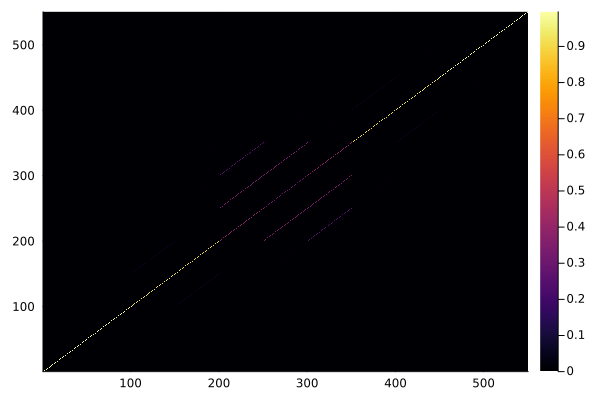

In [156]:
Plots.heatmap(abs2.(U2.data))

In [164]:
circ = Circuit(U)

Circuit(Union{GateSeries, QuantumOpticsBase.Operator}[Operator(dim=11x11)
  basis: BlochBasis{Int64}([11], 5, 11)
 1.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  1.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  1.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     1.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  1.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  1.0+0.0im, Operator(dim=11x11)
  basis: BlochBasis{Int64}([11], 5, 11)
 0.999764+0.0217466im       0.0+0.0im        …       0.0+0.0im
   

In [166]:
circ = Circuit()

Circuit(Union{GateSeries, QuantumOpticsBase.Operator}[])

In [98]:
cat

cat (generic function with 17 methods)

In [99]:
function test(X...)
    for x in X
        print(x)
    end
end

test (generic function with 1 method)

In [100]:
test(1, 2, 3)

Base.Generator{Tuple{Int64, Int64, Int64}, typeof(identity)}(identity, (1, 2, 3))